 ייבוא ספריות


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



 שלב 1: טעינת הנתונים


In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Dataset Loaded: {X.shape[0]} samples, {X.shape[1]} features, {len(set(y))} target classes")

Dataset Loaded: 569 samples, 30 features, 2 target classes


שלב 2: ויזואליזציה של הנתונים

In [3]:
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
X_subset = X[:5]
y_subset = y[:5]
X_tsne = tsne.fit_transform(X_subset)


DataFrame

In [4]:
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
tsne_df['Target'] = y_subset


גרף פיזור

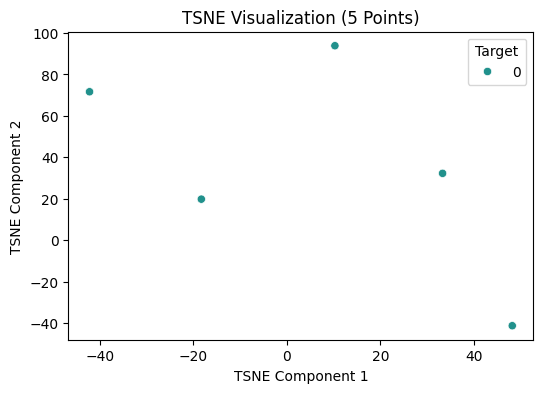

In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=tsne_df, x='TSNE Component 1', y='TSNE Component 2', hue='Target', palette='viridis')
plt.title('TSNE Visualization (5 Points)')
plt.show()

שלב 3: חלוקת הנתונים

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train/Test Split: {X_train.shape[0]} train samples, {X_test.shape[0]} test samples")

Train/Test Split: 455 train samples, 114 test samples


Decision Tree

In [7]:
model_decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Random Forest

In [8]:
model_random_forest = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=10, min_samples_split=5)
model_random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=150,
                       random_state=42)

AdaBoost

In [9]:
model_adaboost = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.8)
model_adaboost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

הערכת המודלים

In [10]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    return accuracy, precision, recall, f1


הערכת המודלים

In [11]:
results = {}
results['Decision Tree'] = evaluate_model("Decision Tree", model_decision_tree, X_test, y_test)
results['Random Forest'] = evaluate_model("Random Forest", model_random_forest, X_test, y_test)
results['AdaBoost'] = evaluate_model("AdaBoost", model_adaboost, X_test, y_test)



Decision Tree Results:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[40  3]
 [ 3 68]]

Random Forest Results:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
[[40  3]
 [ 1 70]]

AdaBoost Results:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
Confusion Matrix:
[[41  2]
 [ 1 70]]


השוואת מודלים והכרזה על מנצח

In [12]:
best_model = max(results.items(), key=lambda x: x[1][3])  # F1 Score הוא המדד הרביעי
print(f"\nThe best model is {best_model[0]} with an F1 score of {best_model[1][3]:.2f}")


The best model is AdaBoost with an F1 score of 0.98
